In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib
from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import StandardScaler


%store -r X_features_full
%store -r X_features_poly_full
%store -r y_labels_full

%store -r totaldf_full
totaldf = totaldf_full
X_features = X_features_full
X_features_poly = X_features_poly_full
y_labels = y_labels_full

In [2]:
lin_reg = joblib.load("linear_regressor.pkl")
poly_lin_reg = joblib.load("poly_lin_reg.pkl")
poly_sgd_reg = joblib.load("sgd_reg.pkl")
poly_ridge_reg = joblib.load("poly_ridge_reg.pkl")
poly_lasso_reg = joblib.load("poly_lasso_reg.pkl")
poly_elastic_net = joblib.load("poly_elastic_reg.pkl")

In [3]:
totaldf.insert(7,'lin μ', totaldf.μob*(np.exp(np.power(lin_reg.predict(X_features[2]),2)) -0.0012))
totaldf.insert(8,'poly lin μ', totaldf.μob*(np.exp(np.power(poly_lin_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(9,'poly sgd μ', totaldf.μob*(np.exp(np.power(poly_sgd_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(10,'poly ridge μ', totaldf.μob*(np.exp(np.power(poly_ridge_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(11,'poly lasso μ', totaldf.μob*(np.exp(np.power(poly_lasso_reg.predict(X_features_poly[2]),2)) -0.0012))
totaldf.insert(12,'poly elastic μ', totaldf.μob*(np.exp(np.power(poly_elastic_net.predict(X_features_poly[2]),2)) -0.0012))


In [4]:
totaldf

,Pb,P,ΔP,μob,μ,Rsob,API,lin μ,poly lin μ,poly sgd μ,poly ridge μ,poly lasso μ,poly elastic μ,Tr
0,2200.008903,2200.008903,0.000000,0.998677,0.998677,478.607857,32.545608,0.998988,0.998593,0.998220,0.998299,0.998513,0.998258,336.150
1,2200.008903,2348.166747,148.157844,0.998677,1.007916,478.607857,32.545608,1.017821,1.013645,1.014726,1.017013,1.016789,1.016700,336.150
2,2200.008903,2496.324590,296.315687,0.998677,1.017489,478.607857,32.545608,1.032192,1.026974,1.028182,1.031441,1.031095,1.031378,336.150
3,2200.008903,2644.482434,444.473531,0.998677,1.027342,478.607857,32.545608,1.045993,1.040454,1.041283,1.045165,1.044819,1.045440,336.150
4,2200.008903,2792.640278,592.631375,0.998677,1.037429,478.607857,32.545608,1.059589,1.054033,1.054276,1.058564,1.058291,1.059206,336.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,3910.006923,5560.005012,1649.998089,0.125500,0.155127,3229.949353,42.548239,0.140759,0.150086,0.140094,0.145424,0.140136,0.140626,365.928
16,3910.006923,5670.004885,1759.997962,0.125500,0.157136,3229.949353,42.548239,0.141733,0.151932,0.141031,0.146894,0.141043,0.141534,365.928
17,3910.006923,5780.004758,1869.997835,0.125500,0.159149,3229.949353,42.548239,0.142711,0.153811,0.141970,0.148385,0.141950,0.142438,365.928
18,3910.006923,5890.004630,1979.997707,0.125500,0.161165,3229.949353,42.548239,0.143693,0.155725,0.142912,0.149898,0.142858,0.143340,365.928


In [24]:
def Stats_matrix(a):
    average_error = []
    standard_deviation = []
    absolute_average_error = []
    absolute_standard_deviation =[]
    for i in range(6):
        average_error.append(np.average((a.iloc[:,i+7]-a.μ)/a.μ*100))
        standard_deviation.append(np.std((a.iloc[:,i+7]-a.μ)/a.μ*100))
        absolute_average_error.append(np.average(np.absolute((a.iloc[:,i+7]-a.μ)/a.μ*100)))
        absolute_standard_deviation.append(np.std(np.absolute((a.iloc[:,i+7]-a.μ)/totaldf.μ*100)))
    statistics  = pd.DataFrame(list(zip(average_error,standard_deviation,absolute_average_error,
                                        absolute_standard_deviation)),columns = ['% AE','% Std Dev AE','%AAE','% Std Dev AAE'],index = ['Linear Regression ','Polynomial Regression ','Gradient Descent','Ridge Regression','Lasso Regression','Elastic Net'])
    return statistics

Stats_matrix(totaldf)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
Linear Regression,-0.437186,5.079954,3.287176,3.897633
Polynomial Regression,0.265674,5.675030,3.188450,4.702163
Gradient Descent,-0.515172,5.150547,3.306617,3.982439
Ridge Regression,-0.060548,4.650844,2.921795,3.618996
Lasso Regression,-0.442114,5.150052,3.325136,3.957521
Elastic Net,-0.407479,5.045181,3.281132,3.854097


In [6]:
visc_0_1 = totaldf.loc[(totaldf.μob<1) & (totaldf.μob>0)]
Stats_matrix(visc_0_1)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear,0.038226,4.042215,2.718928,4.289938
polynomial linear,0.879056,4.800517,2.617115,4.134303
polynomial sgd,0.132198,4.076035,2.725722,4.388121
polynomial ridge regression,0.502578,3.384632,2.344668,3.693609
polynomial lasso regression,0.193394,4.140576,2.811496,4.460976
polynomial elastic net,0.111899,4.130249,2.788325,4.375849


In [7]:
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
Stats_matrix(visc_1_5)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear,0.212584,5.978953,3.809476,77.123485
polynomial linear,-1.887660,6.115565,4.008098,90.230420
polynomial sgd,-0.141990,6.114000,3.796007,80.547552
polynomial ridge regression,-1.169669,5.890942,3.802699,82.503975
polynomial lasso regression,-0.055146,5.972909,3.708998,79.472157
polynomial elastic net,0.026989,5.950927,3.732456,78.509532


In [8]:
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
Stats_matrix(visc_5_20)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear,-1.178588,4.878228,3.126895,141.150875
polynomial linear,-0.915723,5.170104,3.175078,167.037441
polynomial sgd,-1.603031,4.904025,3.223482,144.921520
polynomial ridge regression,-1.278800,4.924781,3.176591,152.272123
polynomial lasso regression,-1.460741,4.812019,3.089602,144.260599
polynomial elastic net,-1.192456,4.827572,3.113219,139.064227


In [9]:
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]
Stats_matrix(visc_20_plus)

,% AE,% Std Dev AE,%AAE,% Std Dev AAE
linear,-8.917430,5.713222,8.920545,1474.212839
polynomial linear,6.019010,8.975182,6.907385,1743.732351
polynomial sgd,-9.112150,5.585696,9.112150,1457.581445
polynomial ridge regression,0.856113,8.583304,5.748612,1388.701916
polynomial lasso regression,-9.111239,5.845540,9.111239,1496.346837
polynomial elastic net,-8.244832,5.318124,8.244832,1356.108303


Text(0, 0.5, '% Average Absolute Error')

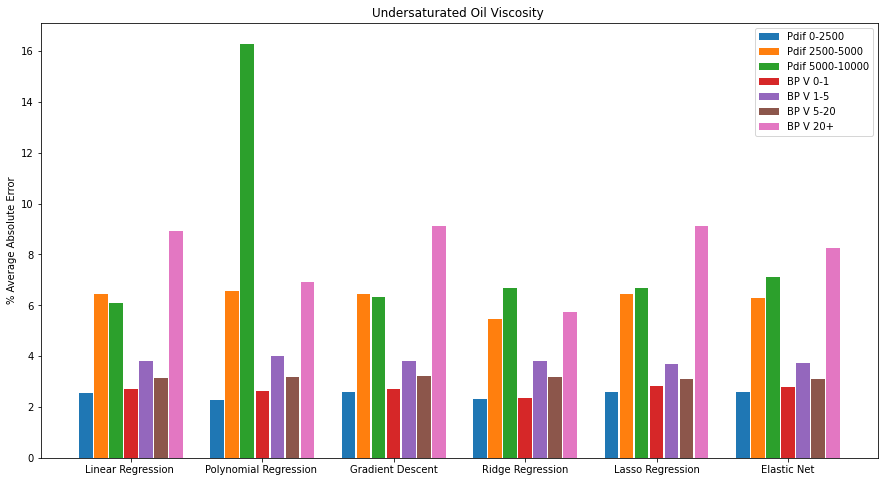

In [26]:
press_0_25 = totaldf.loc[(totaldf.ΔP<2500)]
press_25_50 = totaldf.loc[(totaldf.ΔP<5000)&(totaldf.ΔP>2500)]
press_50_100 = totaldf.loc[(totaldf.ΔP<10000)&(totaldf.ΔP>5000)]
visc_0_1 = totaldf.loc[(totaldf.μob>0) & (totaldf.μob<1)]
visc_1_5 = totaldf.loc[(totaldf.μob>1) & (totaldf.μob<5)]
visc_5_20 = totaldf.loc[(totaldf.μob>5) & (totaldf.μob<20)]
visc_20_plus = totaldf.loc[(totaldf.μob>20) ]

full_data = {
    'Pdif 0-2500' : Stats_matrix(press_0_25).iloc[:,2],
    'Pdif 2500-5000' : Stats_matrix(press_25_50).iloc[:,2],
    'Pdif 5000-10000' : Stats_matrix(press_50_100).iloc[:,2],
    'BP V 0-1' : Stats_matrix(visc_0_1).iloc[:,2],
    'BP V 1-5' : Stats_matrix(visc_1_5).iloc[:,2],
    'BP V 5-20' : Stats_matrix(visc_5_20).iloc[:,2],
    'BP V 20+' : Stats_matrix(visc_20_plus).iloc[:,2],
}    
models =['Linear Regression ','Polynomial Regression ','Gradient Descent','Ridge Regression','Lasso Regression','Elastic Net']


%run my_bar_plot.ipynb
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15, 8)
bar_plot(ax, full_data, total_width=.8, single_width=.9,)
plt.xticks(range(6), models)
plt.title('Undersaturated Oil Viscosity ')
plt.ylabel("% Average Absolute Error")